In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Datasets
books = pd.read_csv('../data/dataset/books.csv')
tags = pd.read_csv('../data/dataset/tags.csv')
ratings = pd.read_csv('../data/dataset/ratings.csv')
books_10k = pd.read_csv('../data/dataset/goodbooks-10k.csv')
book_tags = pd.read_csv('../data/dataset/book_tags.csv')

In [3]:
# Display basic information about each dataset
def display_basic_info(df, name):
    print(f"\n{name} shape: {df.shape}")
    print(f"\n{name} columns: {df.columns}")
    print(f"\n{name} info:\n{df.info()}")
    print(f"\n{name} head:\n{df.head()}")

In [4]:
# Display basic information for each dataset
display_basic_info(books, "Books")


Books shape: (10000, 23)

Books columns: Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300

In [5]:
display_basic_info(tags, "Tags")


Tags shape: (34252, 2)

Tags columns: Index(['tag_id', 'tag_name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Tags info:
None

Tags head:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [6]:
display_basic_info(ratings, "Ratings")


Ratings shape: (5976479, 3)

Ratings columns: Index(['user_id', 'book_id', 'rating'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB

Ratings info:
None

Ratings head:
   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3


In [7]:
display_basic_info(books_10k, "Books_10k")


Books_10k shape: (5976479, 3)

Books_10k columns: Index(['user_id', 'book_id', 'rating'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB

Books_10k info:
None

Books_10k head:
   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3


In [8]:
display_basic_info(book_tags, "Book_Tags")


Book_Tags shape: (999912, 3)

Book_Tags columns: Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB

Book_Tags info:
None

Book_Tags head:
   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716


In [9]:
# Handling missing values
print(f"\nBooks missing values: {books.isnull().sum()}")
print(f"\nTags missing values: {tags.isnull().sum()}")
print(f"\nRatings missing values: {ratings.isnull().sum()}")
print(f"\nBooks_10k missing values: {books_10k.isnull().sum()}")
print(f"\nBook_Tags missing values: {book_tags.isnull().sum()}")


Books missing values: book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Tags missing values: tag_id      0
tag_name    0
dtype: int64

Ratings missing values: user_id    0
book_id    0
rating     0
dtype: int64

Books_10k missing values: user_id    0
bo

In [10]:
# Handling missing values in the Books dataset
# Drop rows with missing ISBN and ISBN13
books = books.dropna(subset=['isbn', 'isbn13'])

# Impute missing values in original_publication_year with the median
median_year = books['original_publication_year'].median()
books['original_publication_year'].fillna(median_year, inplace=True)

# Replace missing values in original_title and language_code
books['original_title'].fillna('Unknown', inplace=True)
books['language_code'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
print(f"\nBooks missing values after handling: {books.isnull().sum()}")


Books missing values after handling: book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\106606693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['original_publication_year'].fillna(median_year, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\106606693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['original_title'].fillna('Unknown', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\106606693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [11]:
# Set up Seaborn for better visualizations
sns.set(style="whitegrid")

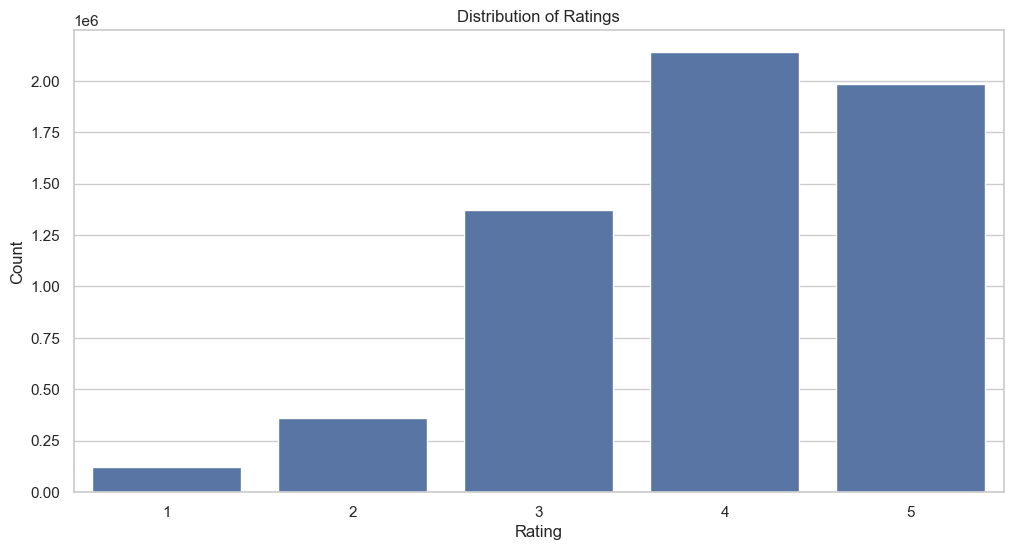

In [12]:
# Task 1: Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\2503591050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count', y='title', data=most_rated_books, palette='viridis')


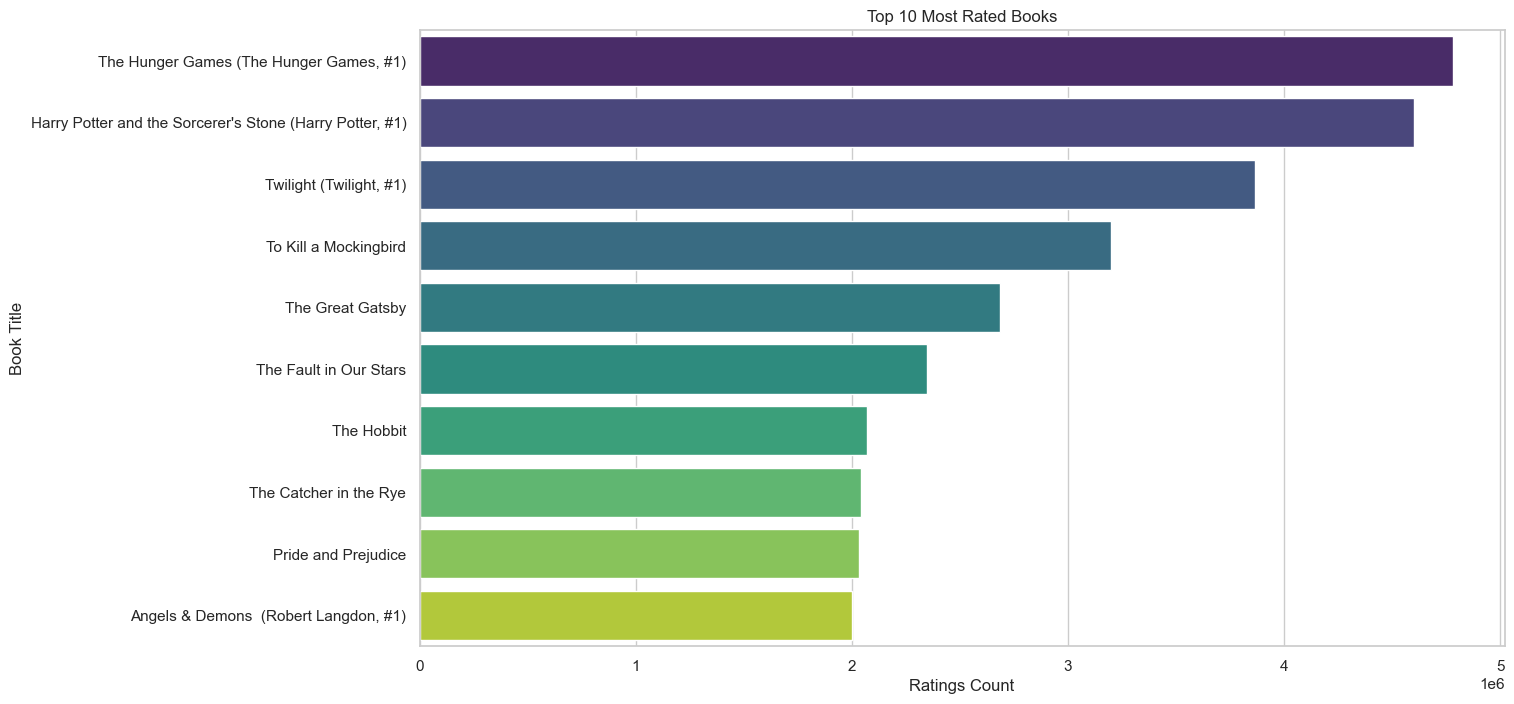

In [13]:
# Task 2: Most Rated Books
most_rated_books = books.sort_values(by='ratings_count', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='ratings_count', y='title', data=most_rated_books, palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\3895802900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')


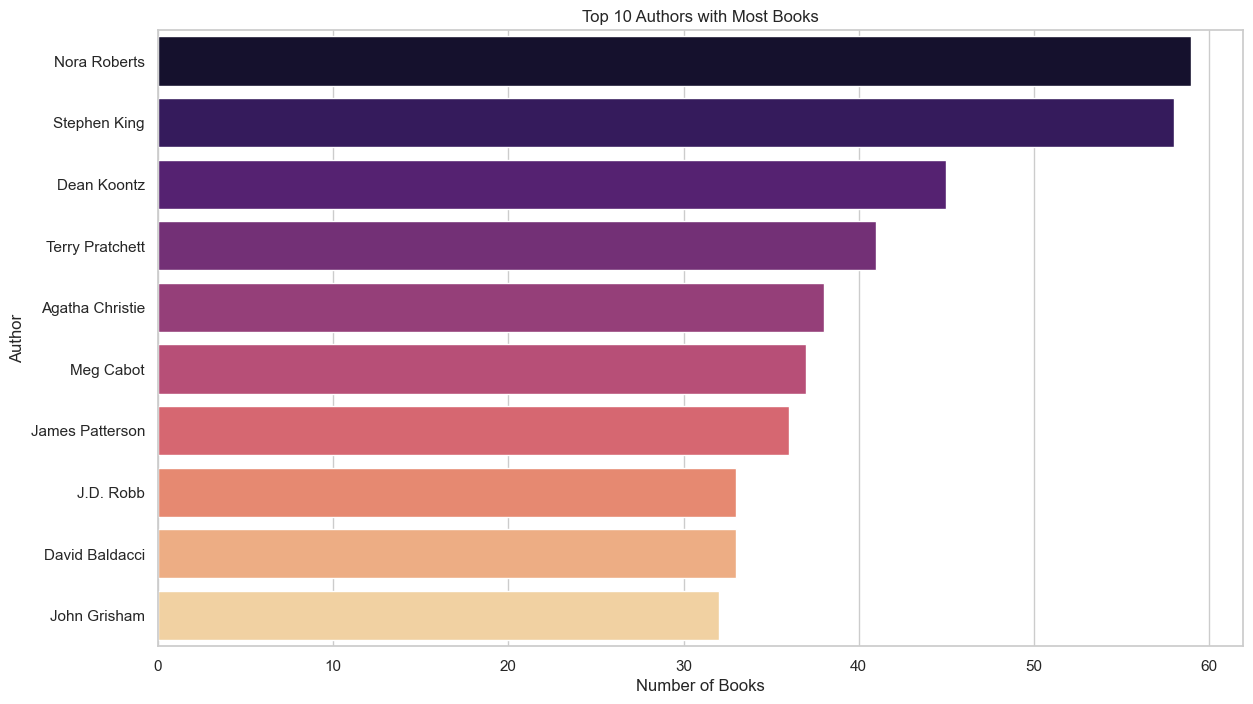

In [14]:
# Task 3: Authors Analysis
top_authors = books['authors'].value_counts().head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

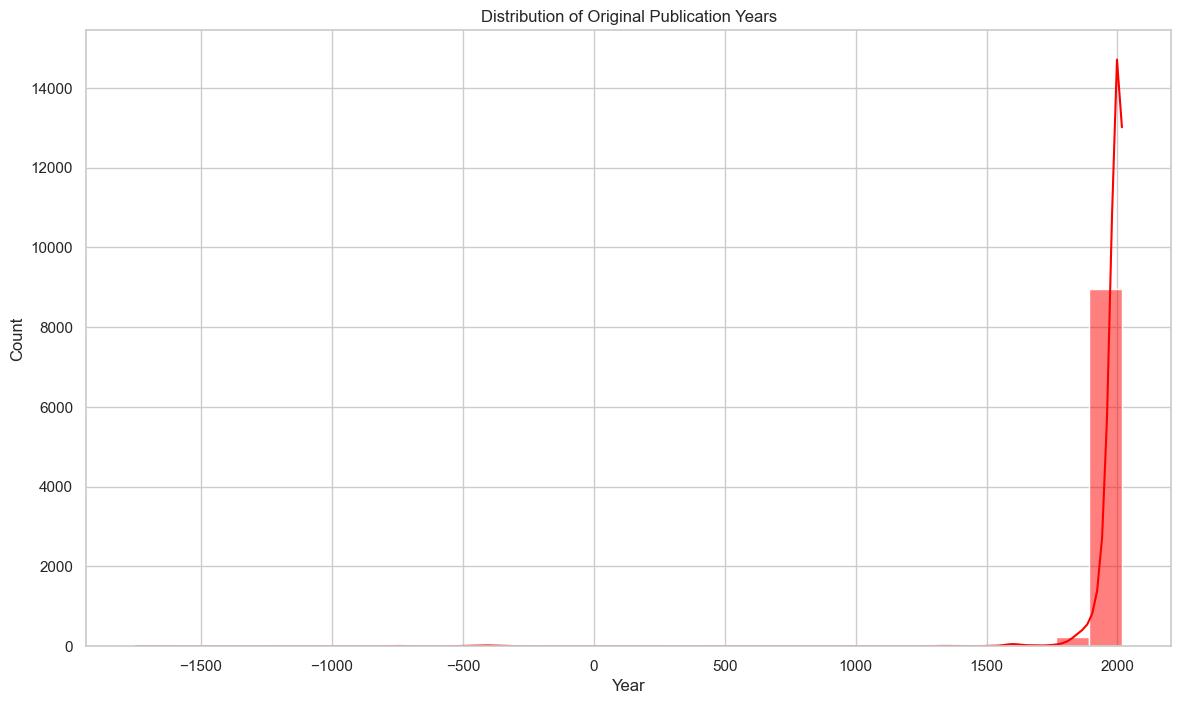

In [15]:
# Task 4: Publication Years
plt.figure(figsize=(14, 8))
sns.histplot(books['original_publication_year'], bins=30, kde=True, color='red')
plt.title('Distribution of Original Publication Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\1191320444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language_code', data=books, palette='Set3', order=books['language_code'].value_counts().index)


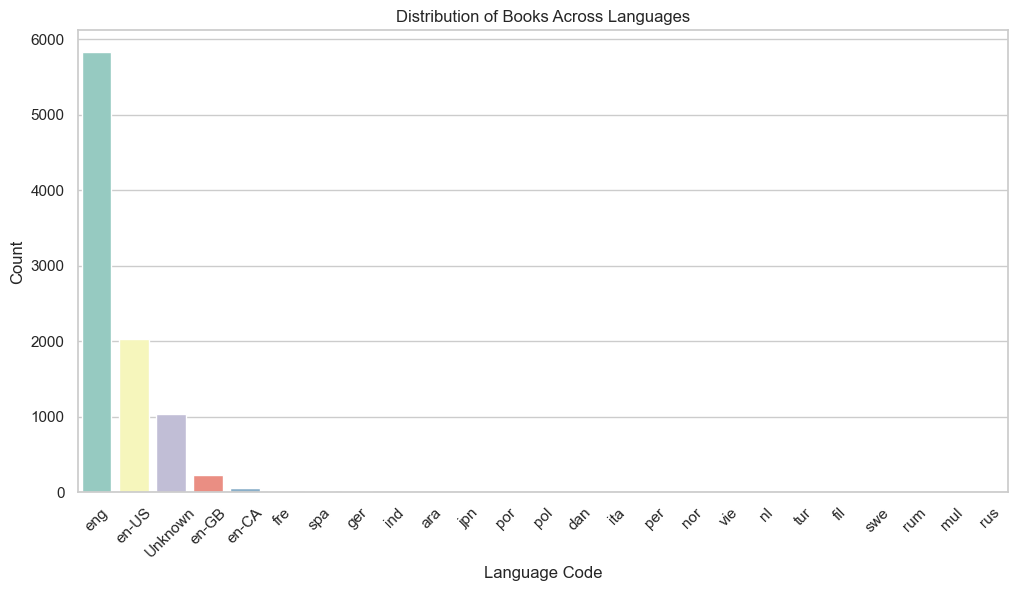

In [16]:
# Task 5: Language Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='language_code', data=books, palette='Set3', order=books['language_code'].value_counts().index)
plt.title('Distribution of Books Across Languages')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Further EDA and Analysis Tasks:
1. Content-Based Filtering:

    1.1 Analyze Book Titles:

        Tokenize and analyze the words present in book titles.
        Create a word cloud to visualize frequently occurring words.

    1.2 Analyze Authors:

        Explore the distribution of authors.
        Identify authors with the most books.

In [17]:
# import wordcloud
from wordcloud import WordCloud

In [18]:
# Task 1.1: Analyze Book Titles
# Tokenize and analyze words in book titles
all_titles = ' '.join(books['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

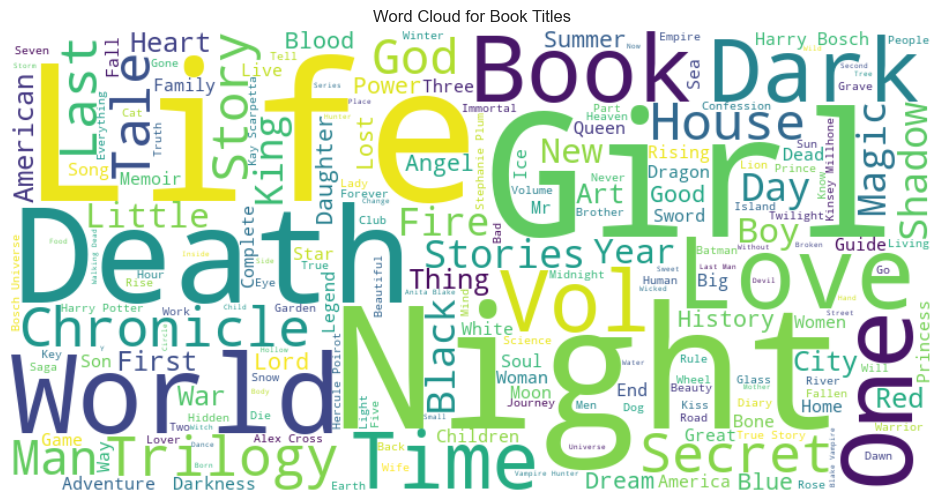

In [19]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()

E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27193 (\N{CJK UNIFIED IDEOGRAPH-6A39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26716 (\N{CJK UNIFIED IDEOGRAPH-685C}) missing from current font.
  fig.canvas.print_fig

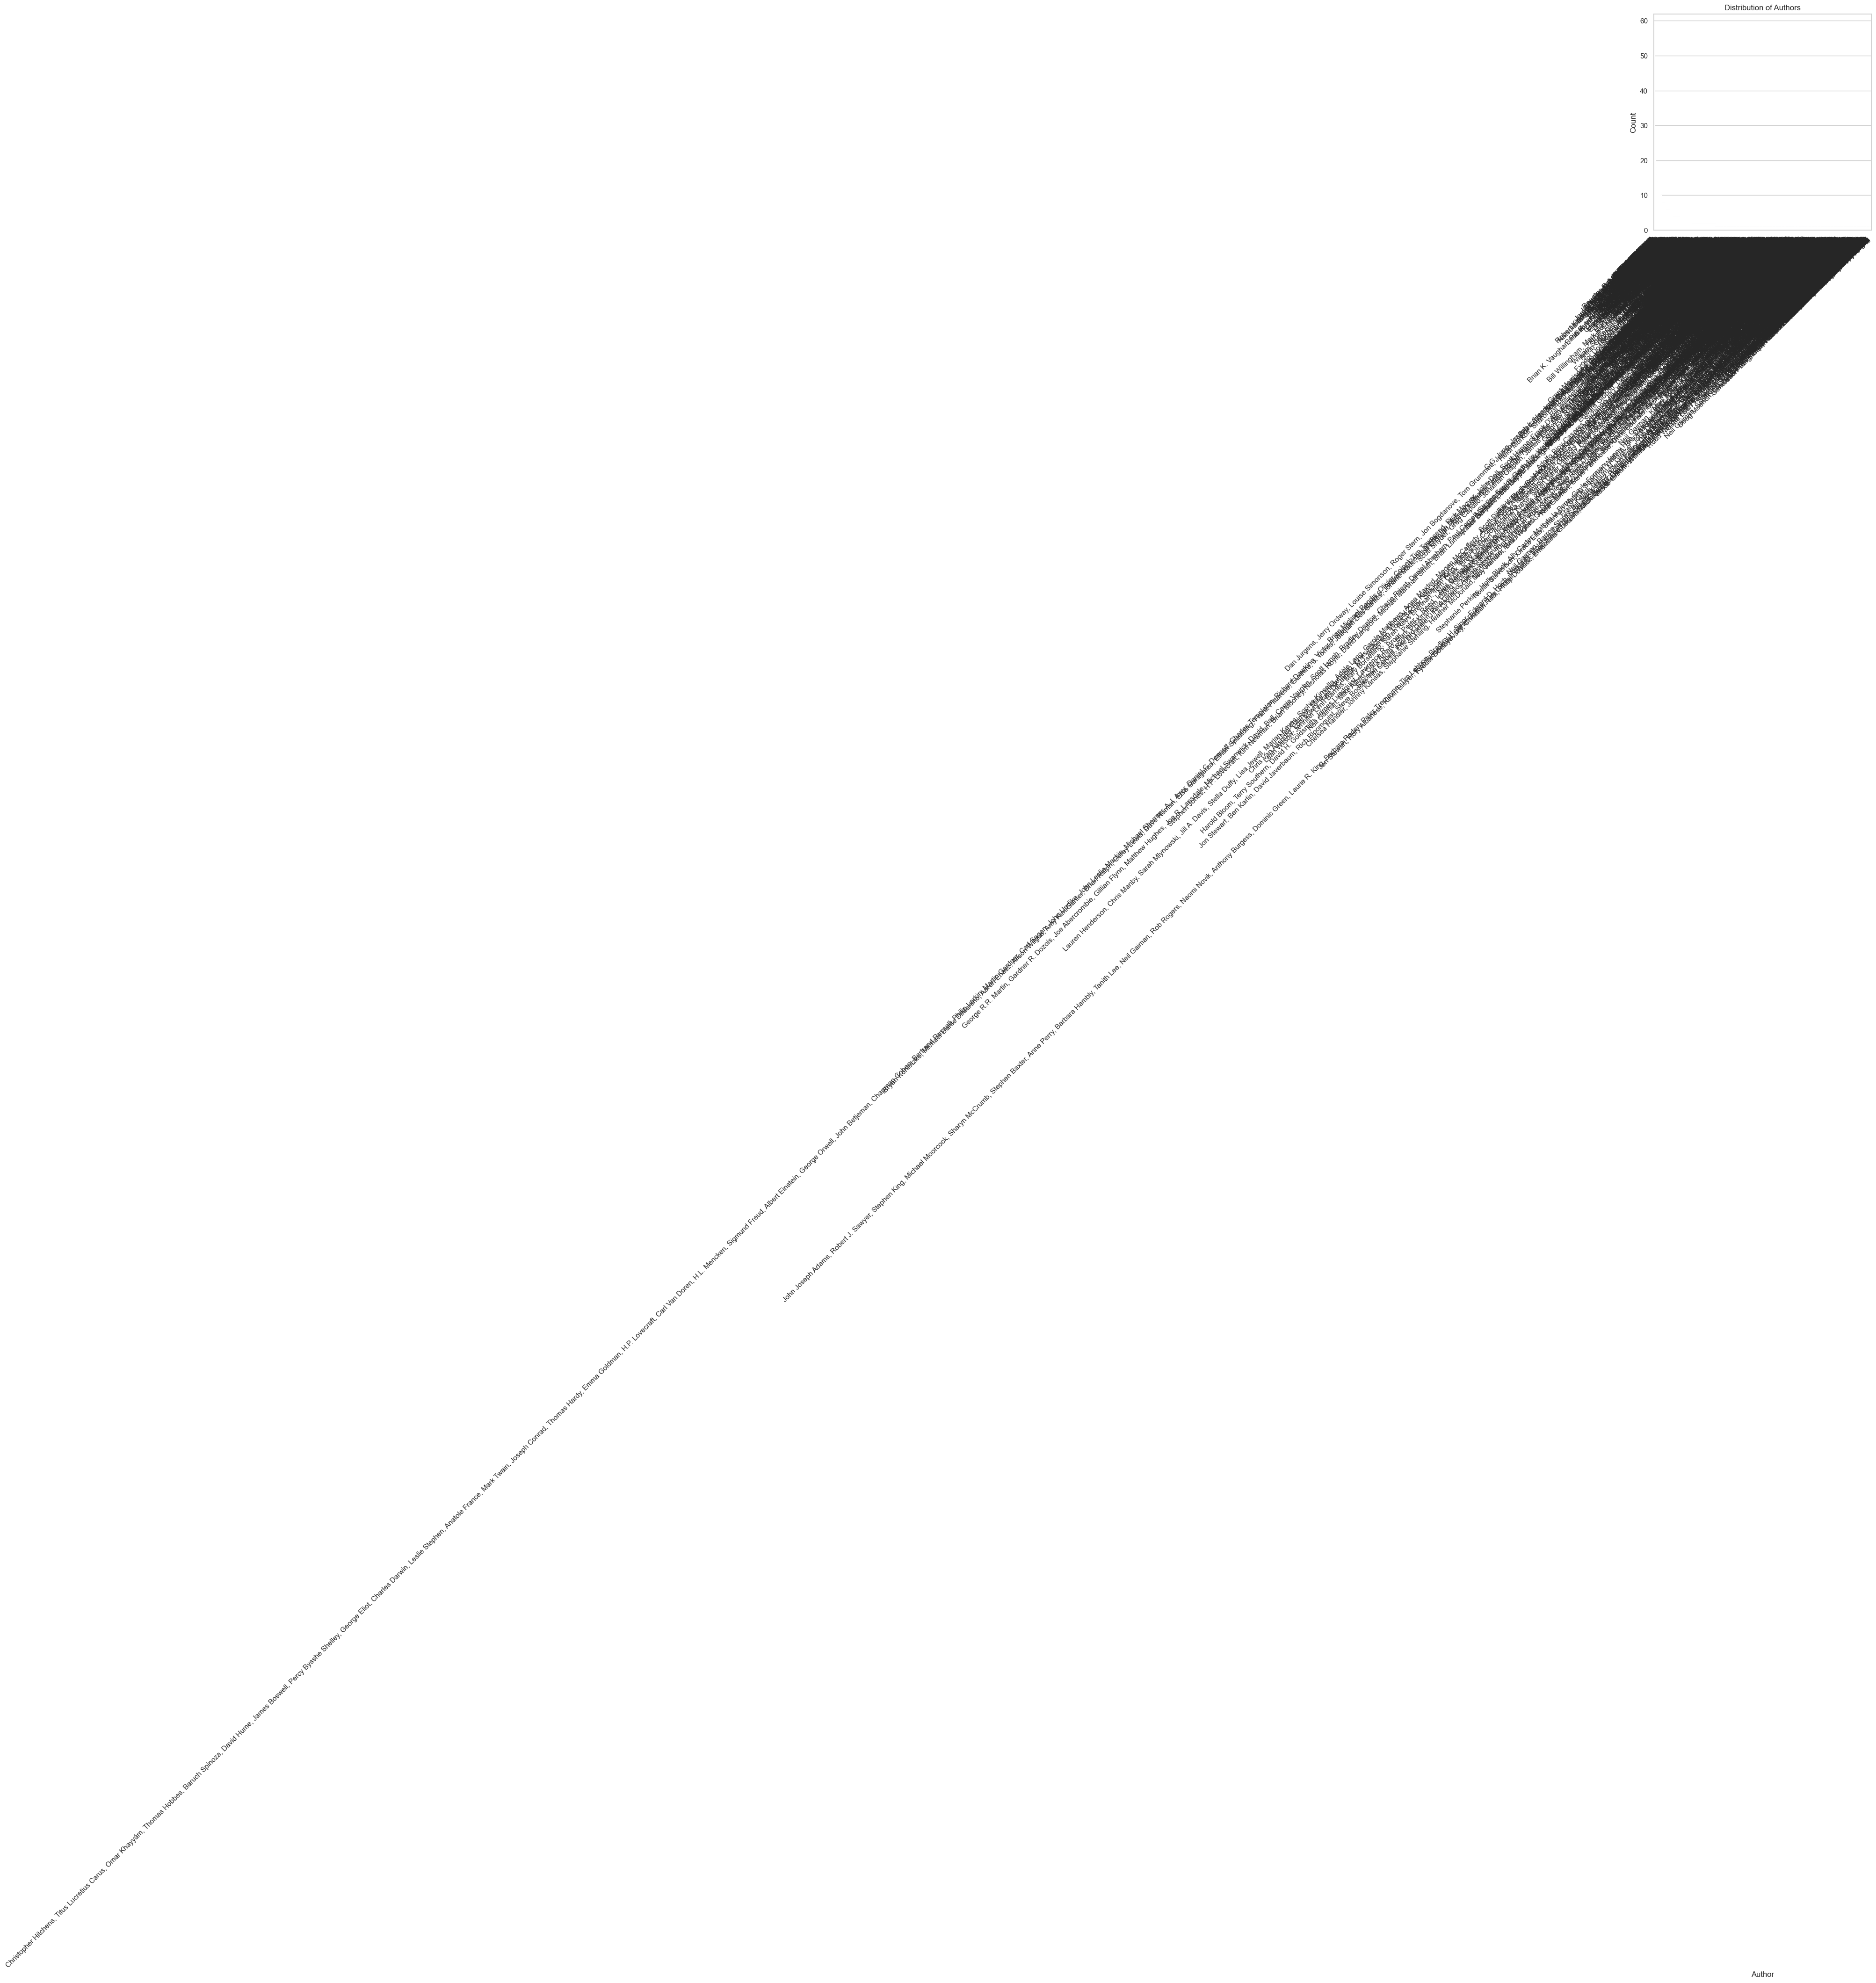

In [20]:
# Task 1.2: Analyze Authors
# Explore the distribution of authors
plt.figure(figsize=(6, 6))
sns.countplot(x='authors', data=books, order=books['authors'].value_counts().index)
plt.title('Distribution of Authors')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Collaborative Filtering:

    2.1 User Ratings Analysis:

        Explore the distribution of the number of ratings per user.
        Identify the most active users.

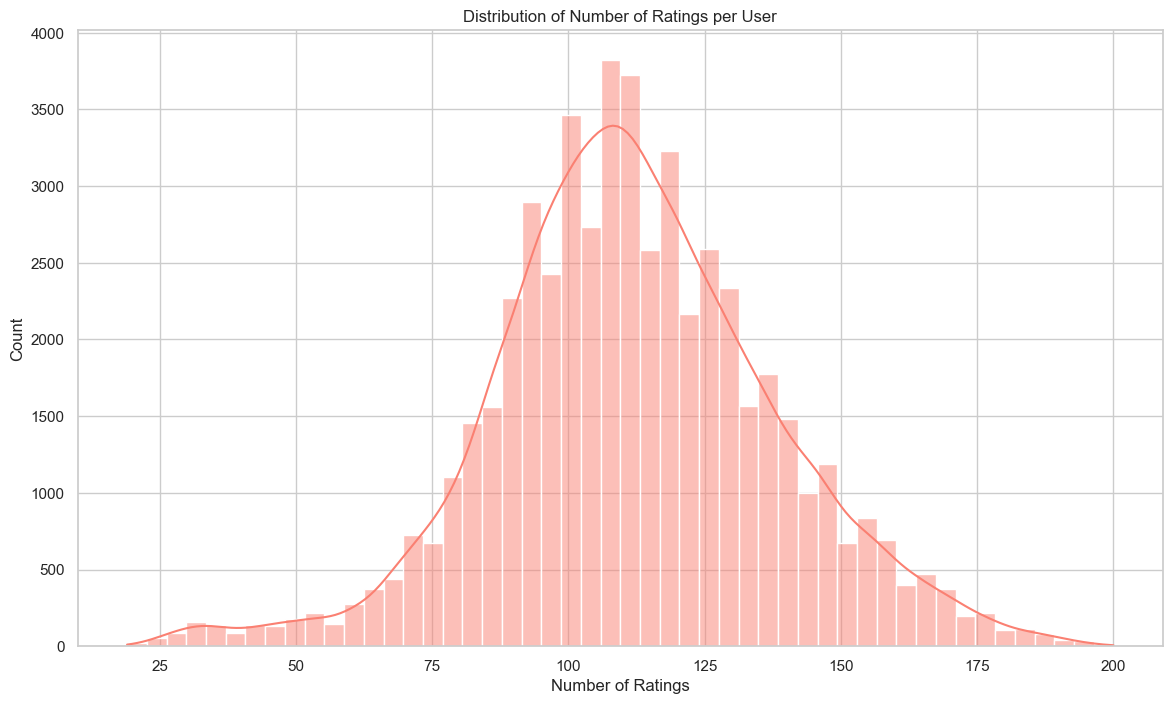

In [22]:
# Task 2.1: User Ratings Analysis
# Explore the distribution of the number of ratings per user
user_ratings_count = ratings['user_id'].value_counts()

plt.figure(figsize=(14, 8))
sns.histplot(user_ratings_count, bins=50, kde=True, color='salmon')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

3. Tag Analysis:

    3.1 Explore Tags Distribution:

        Visualize the distribution of tags.

    3.2 Tag Associations:

        Explore how tags are associated with books in the book_tags dataset.

In [23]:
# # Task 3.1: Explore Tags Distribution
# plt.figure(figsize=(14, 8))
# tag_counts = tags['tag_name'].value_counts()
# plt.bar(tag_counts.index, tag_counts.values, color='skyblue')
# plt.title('Distribution of Tags')
# plt.xlabel('Tag')
# # plt.ylabel('Count')
# plt.show()

E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35799 (\N{CJK UNIFIED IDEOGRAPH-8BD7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27468 (\N{CJK UNIFIED IDEOGRAPH-6B4C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65317 (\N{FULLWIDTH LATIN CAPITAL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65330 (\N{FULLWIDTH LATIN CAPITAL LETTER R}) missing from current font.
  fi

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\1175404657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='tag_name', data=top_tags_association, palette='Set2')


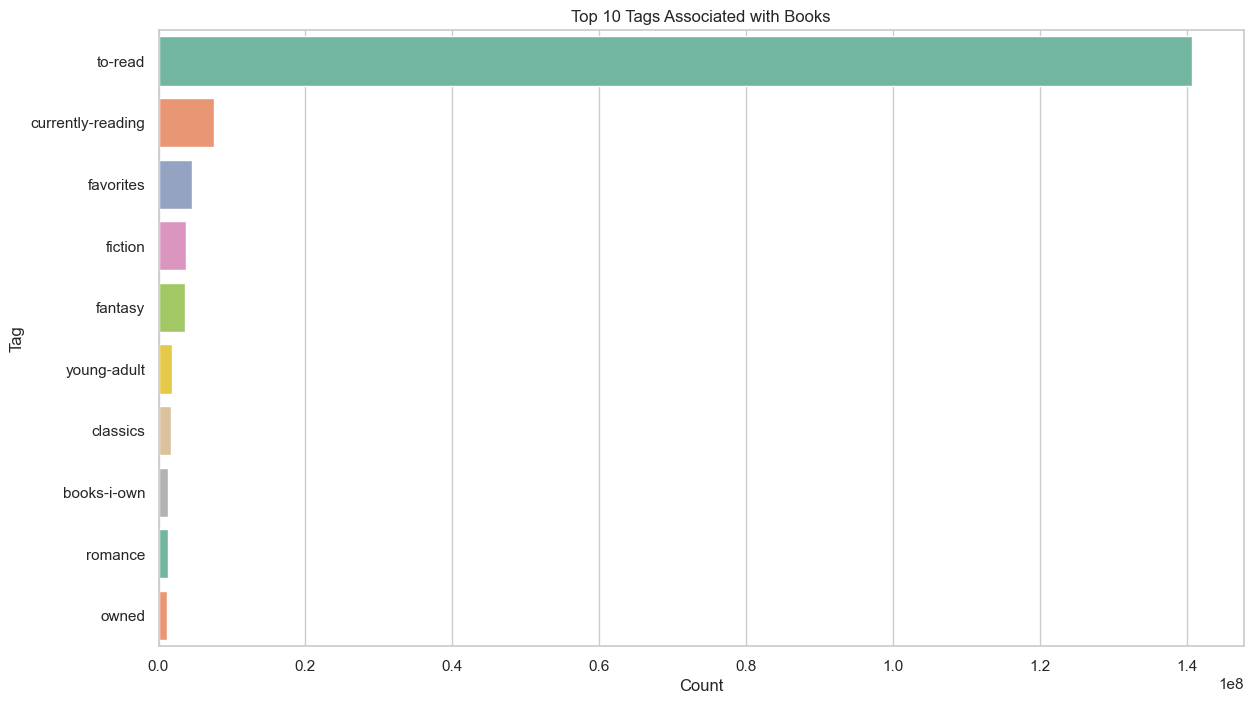

In [27]:
# Task 3.2: Tag Associations
# (Example: Top 10 tags associated with books)
top_tags_association = book_tags.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(10)
top_tags_association = pd.merge(top_tags_association, tags, left_index=True, right_on='tag_id')
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='tag_name', data=top_tags_association, palette='Set2')
plt.title('Top 10 Tags Associated with Books')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

### Correlation Analysis

1. Numerical Feature Correlation:

    1.1 Explore Correlation Matrix:

        Visualize the correlation matrix between numerical features.
        Identify strong positive/negative correlations.

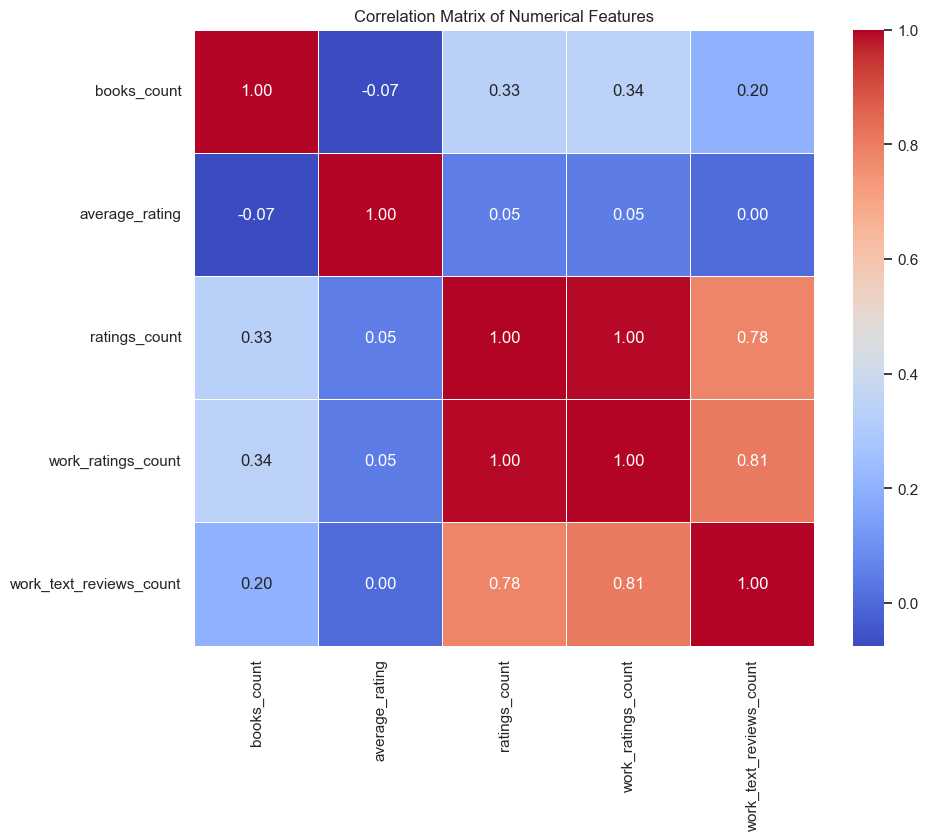

In [28]:
# # Extract relevant numerical features for correlation analysis
numerical_features = ['books_count', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count']

# Create a correlation matrix
correlation_matrix = books[numerical_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [30]:
# Import necessary libraries for text processing
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Apply text preprocessing to 'title' and 'authors' columns
books['title'] = books['title'].apply(preprocess_text)
books['authors'] = books['authors'].apply(preprocess_text)

# Display a few preprocessed titles and authors
print("Sample Titles after Preprocessing:")
print(books['title'].head())

print("\n\n\n Sample Authors after Preprocessing:\n\n")
print(books['authors'].head())

Sample Titles after Preprocessing:
0                     hunger game hunger game 1
1    harry potter sorcerer stone harry potter 1
2                           twilight twilight 1
3                              kill mockingbird
4                                  great gatsby
Name: title, dtype: object



 Sample Authors after Preprocessing:


0             suzanne collins
1    jk rowling mary grandpré
2             stephenie meyer
3                  harper lee
4          f scott fitzgerald
Name: authors, dtype: object


---

## 1. Content-Based Filtering Analysis


1.1 Word Clouds

In [33]:
# from wordcloud import WordCloud
# from matplotlib import pyplot as plt

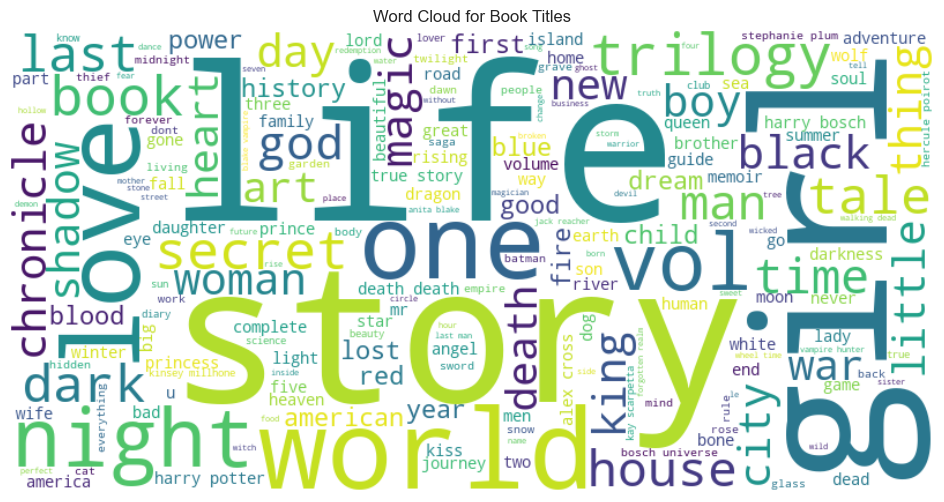

In [34]:
# Create Word Cloud for Titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(books['title']))
plt.figure(figsize=(12, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()

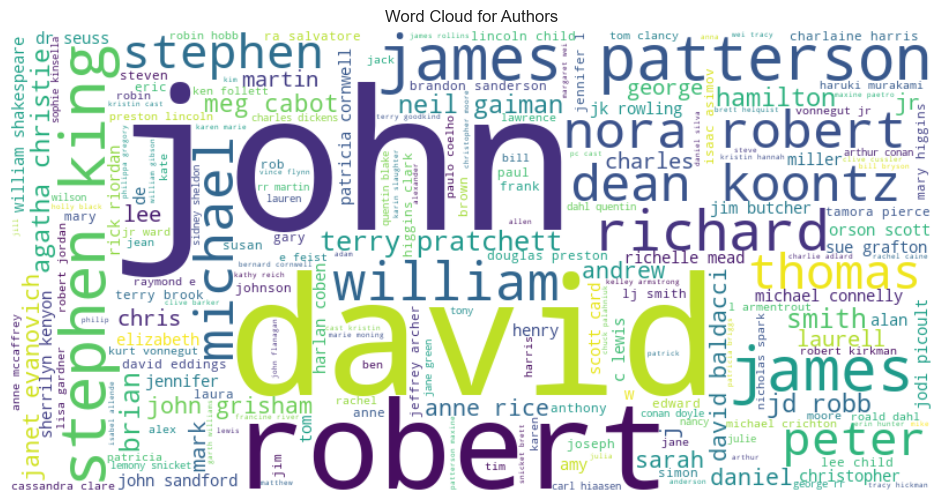

In [35]:
# Create Word Cloud for Authors
author_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(books['authors']))
plt.figure(figsize=(12, 6))
plt.imshow(author_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Authors')
plt.show()

1. 2  Term Frequency-Inverse Document Frequency (TF-IDF):

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization for Titles
tfidf_vectorizer_titles = TfidfVectorizer()
tfidf_matrix_titles = tfidf_vectorizer_titles.fit_transform(books['title'])

# TF-IDF Vectorization for Authors
tfidf_vectorizer_authors = TfidfVectorizer()
tfidf_matrix_authors = tfidf_vectorizer_authors.fit_transform(books['authors'])

# Display TF-IDF matrices
print(tfidf_matrix_titles.shape)
print(tfidf_matrix_authors.shape)

(9280, 8092)
(9280, 5980)


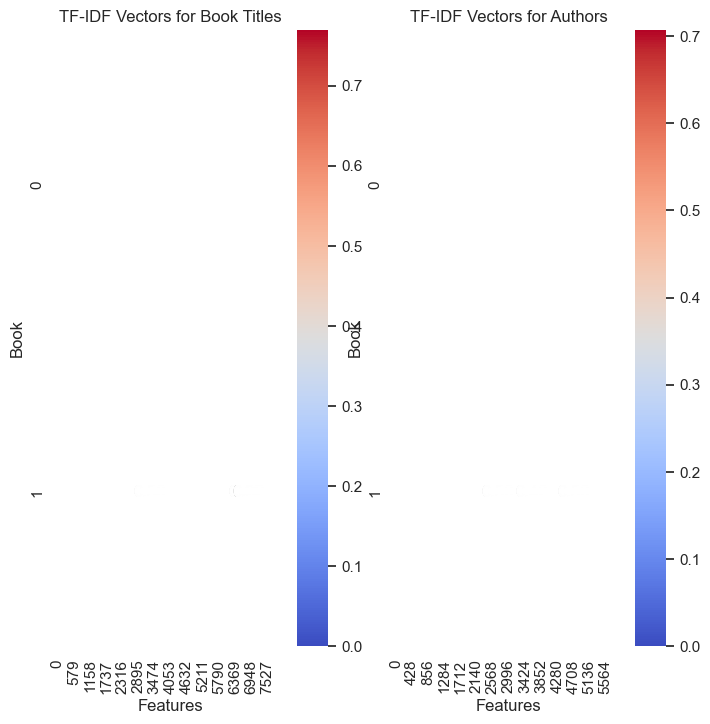

In [39]:
# Display TF-IDF vectors for the first 2 book titles and authors in plot
titles = tfidf_matrix_titles.todense()[0:2]
authors = tfidf_matrix_authors.todense()[0:2]
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
sns.heatmap(titles, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('TF-IDF Vectors for Book Titles')
plt.xlabel('Features')
plt.ylabel('Book')
plt.subplot(1, 2, 2)
sns.heatmap(authors, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('TF-IDF Vectors for Authors')
plt.xlabel('Features')
plt.ylabel('Book')
plt.show()

## 2. Collaborative Filtering Analysis:

2.1 User Interactions

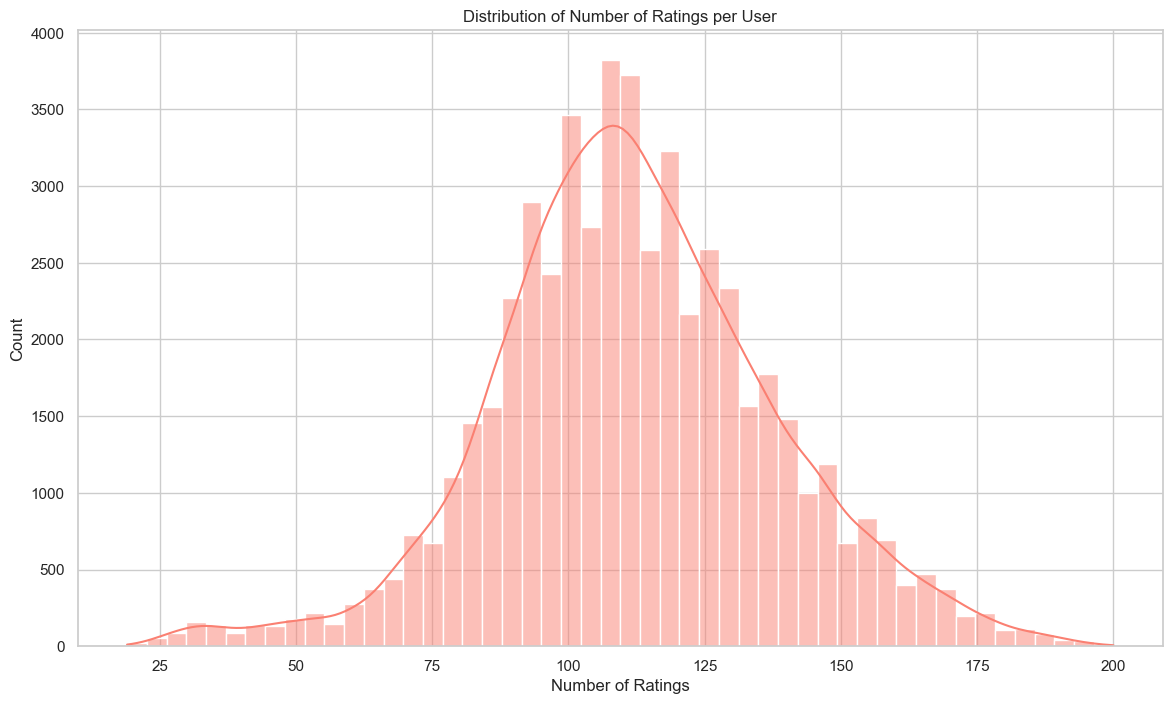

Top 10 Most Active Users:
user_id
12874    200
30944    200
52036    199
12381    199
28158    199
45554    197
6630     197
37834    196
15604    196
7563     196
Name: count, dtype: int64


In [40]:
# Visualize the Distribution of Ratings per User
user_ratings_count = ratings['user_id'].value_counts()
plt.figure(figsize=(14, 8))
sns.histplot(user_ratings_count, bins=50, kde=True, color='salmon')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Identify the Most Active Users
most_active_users = user_ratings_count.head(10)
print("Top 10 Most Active Users:")
print(most_active_users)

2.2 Book Ratings

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\3022995441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


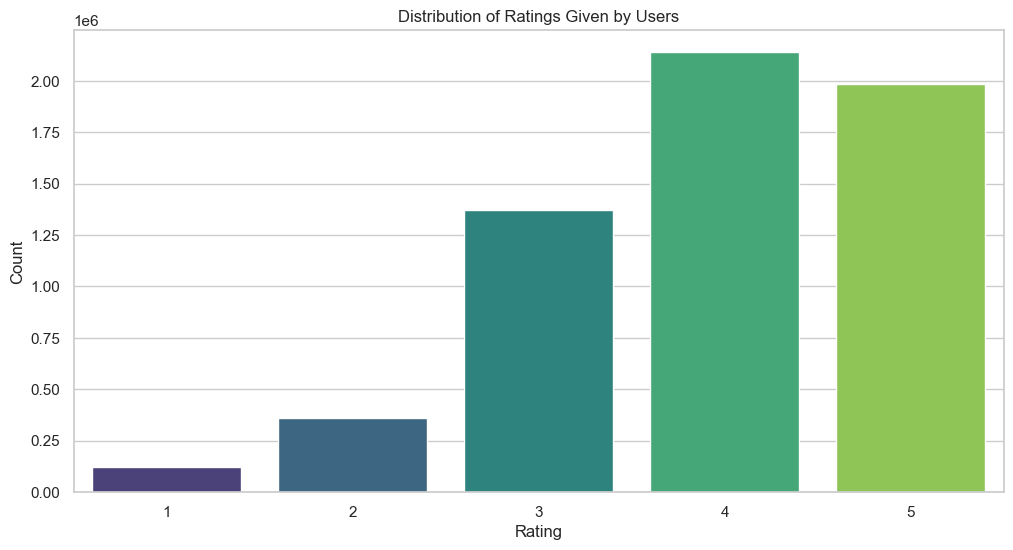

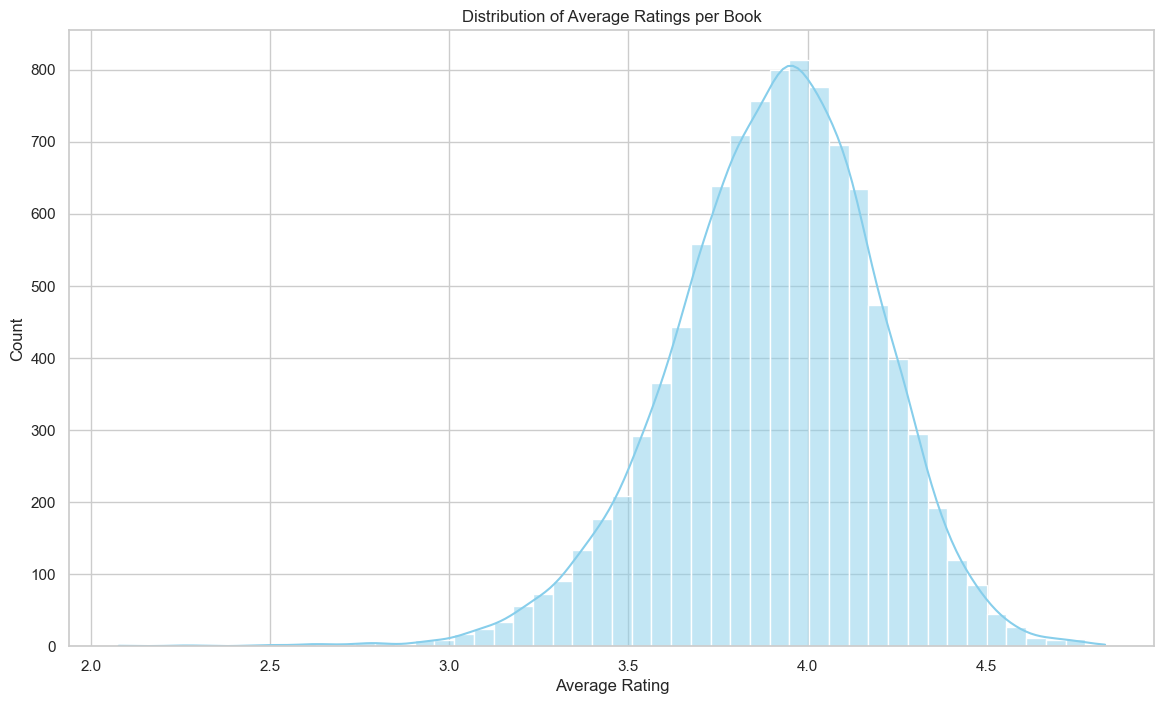

In [41]:
# Explore the Distribution of Ratings Given by Users
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Ratings Given by Users')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Analyze the Average Rating per Book
average_rating_per_book = ratings.groupby('book_id')['rating'].mean()
plt.figure(figsize=(14, 8))
sns.histplot(average_rating_per_book, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings per Book')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

## 3. Tag Analysis

3.1 Tag Distribution

In [42]:
# # Visualize the Distribution of Tags
# plt.figure(figsize=(14, 8))
# sns.countplot(x='tag_name', data=tags, order=tags['tag_name'].value_counts().index, palette='pastel')
# plt.title('Distribution of Tags')
# plt.xlabel('Tag')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\1238138227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tag_name', data=tags, order=tags['tag_name'].value_counts().index, palette='pastel')
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35799 (\N{CJK UNIFIED IDEOGRAPH-8BD7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27468 (\N{CJK UNIFIED IDEOGRAPH-6B4C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65331 (\N{FULLWIDTH LATIN CAPITAL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib

3.2 Tag Association

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\2291007444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='tag_name', data=top_tags_association, palette='Set2')


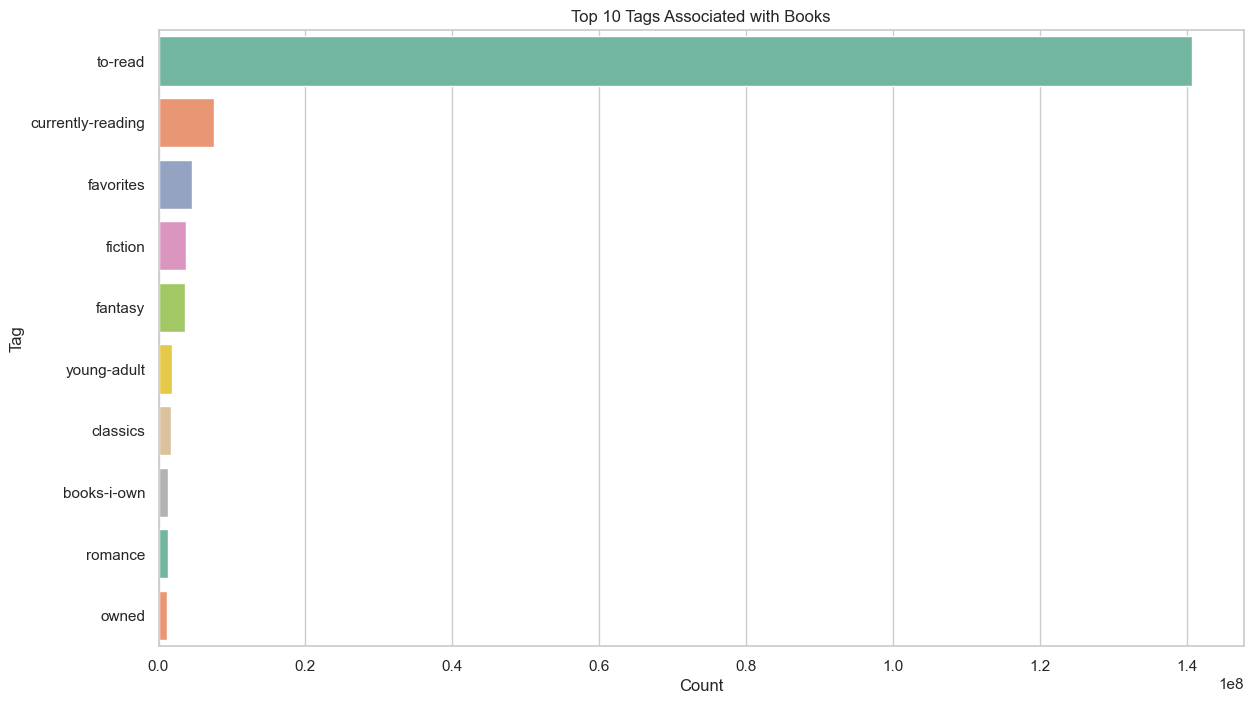

In [43]:
# Explore how Tags are Associated with Books in the `book_tags` dataset
top_tags_association = book_tags.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(10)
top_tags_association = pd.merge(top_tags_association, tags, left_index=True, right_on='tag_id')
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='tag_name', data=top_tags_association, palette='Set2')
plt.title('Top 10 Tags Associated with Books')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()


## 4. Additional Visualizations

4.1 Genre Analysis

E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27193 (\N{CJK UNIFIED IDEOGRAPH-6A39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Python\book_recommender\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26716 (\N{CJK UNIFIED IDEOGRAPH-685C}) missing from current font.
  fig.canvas.print_fig

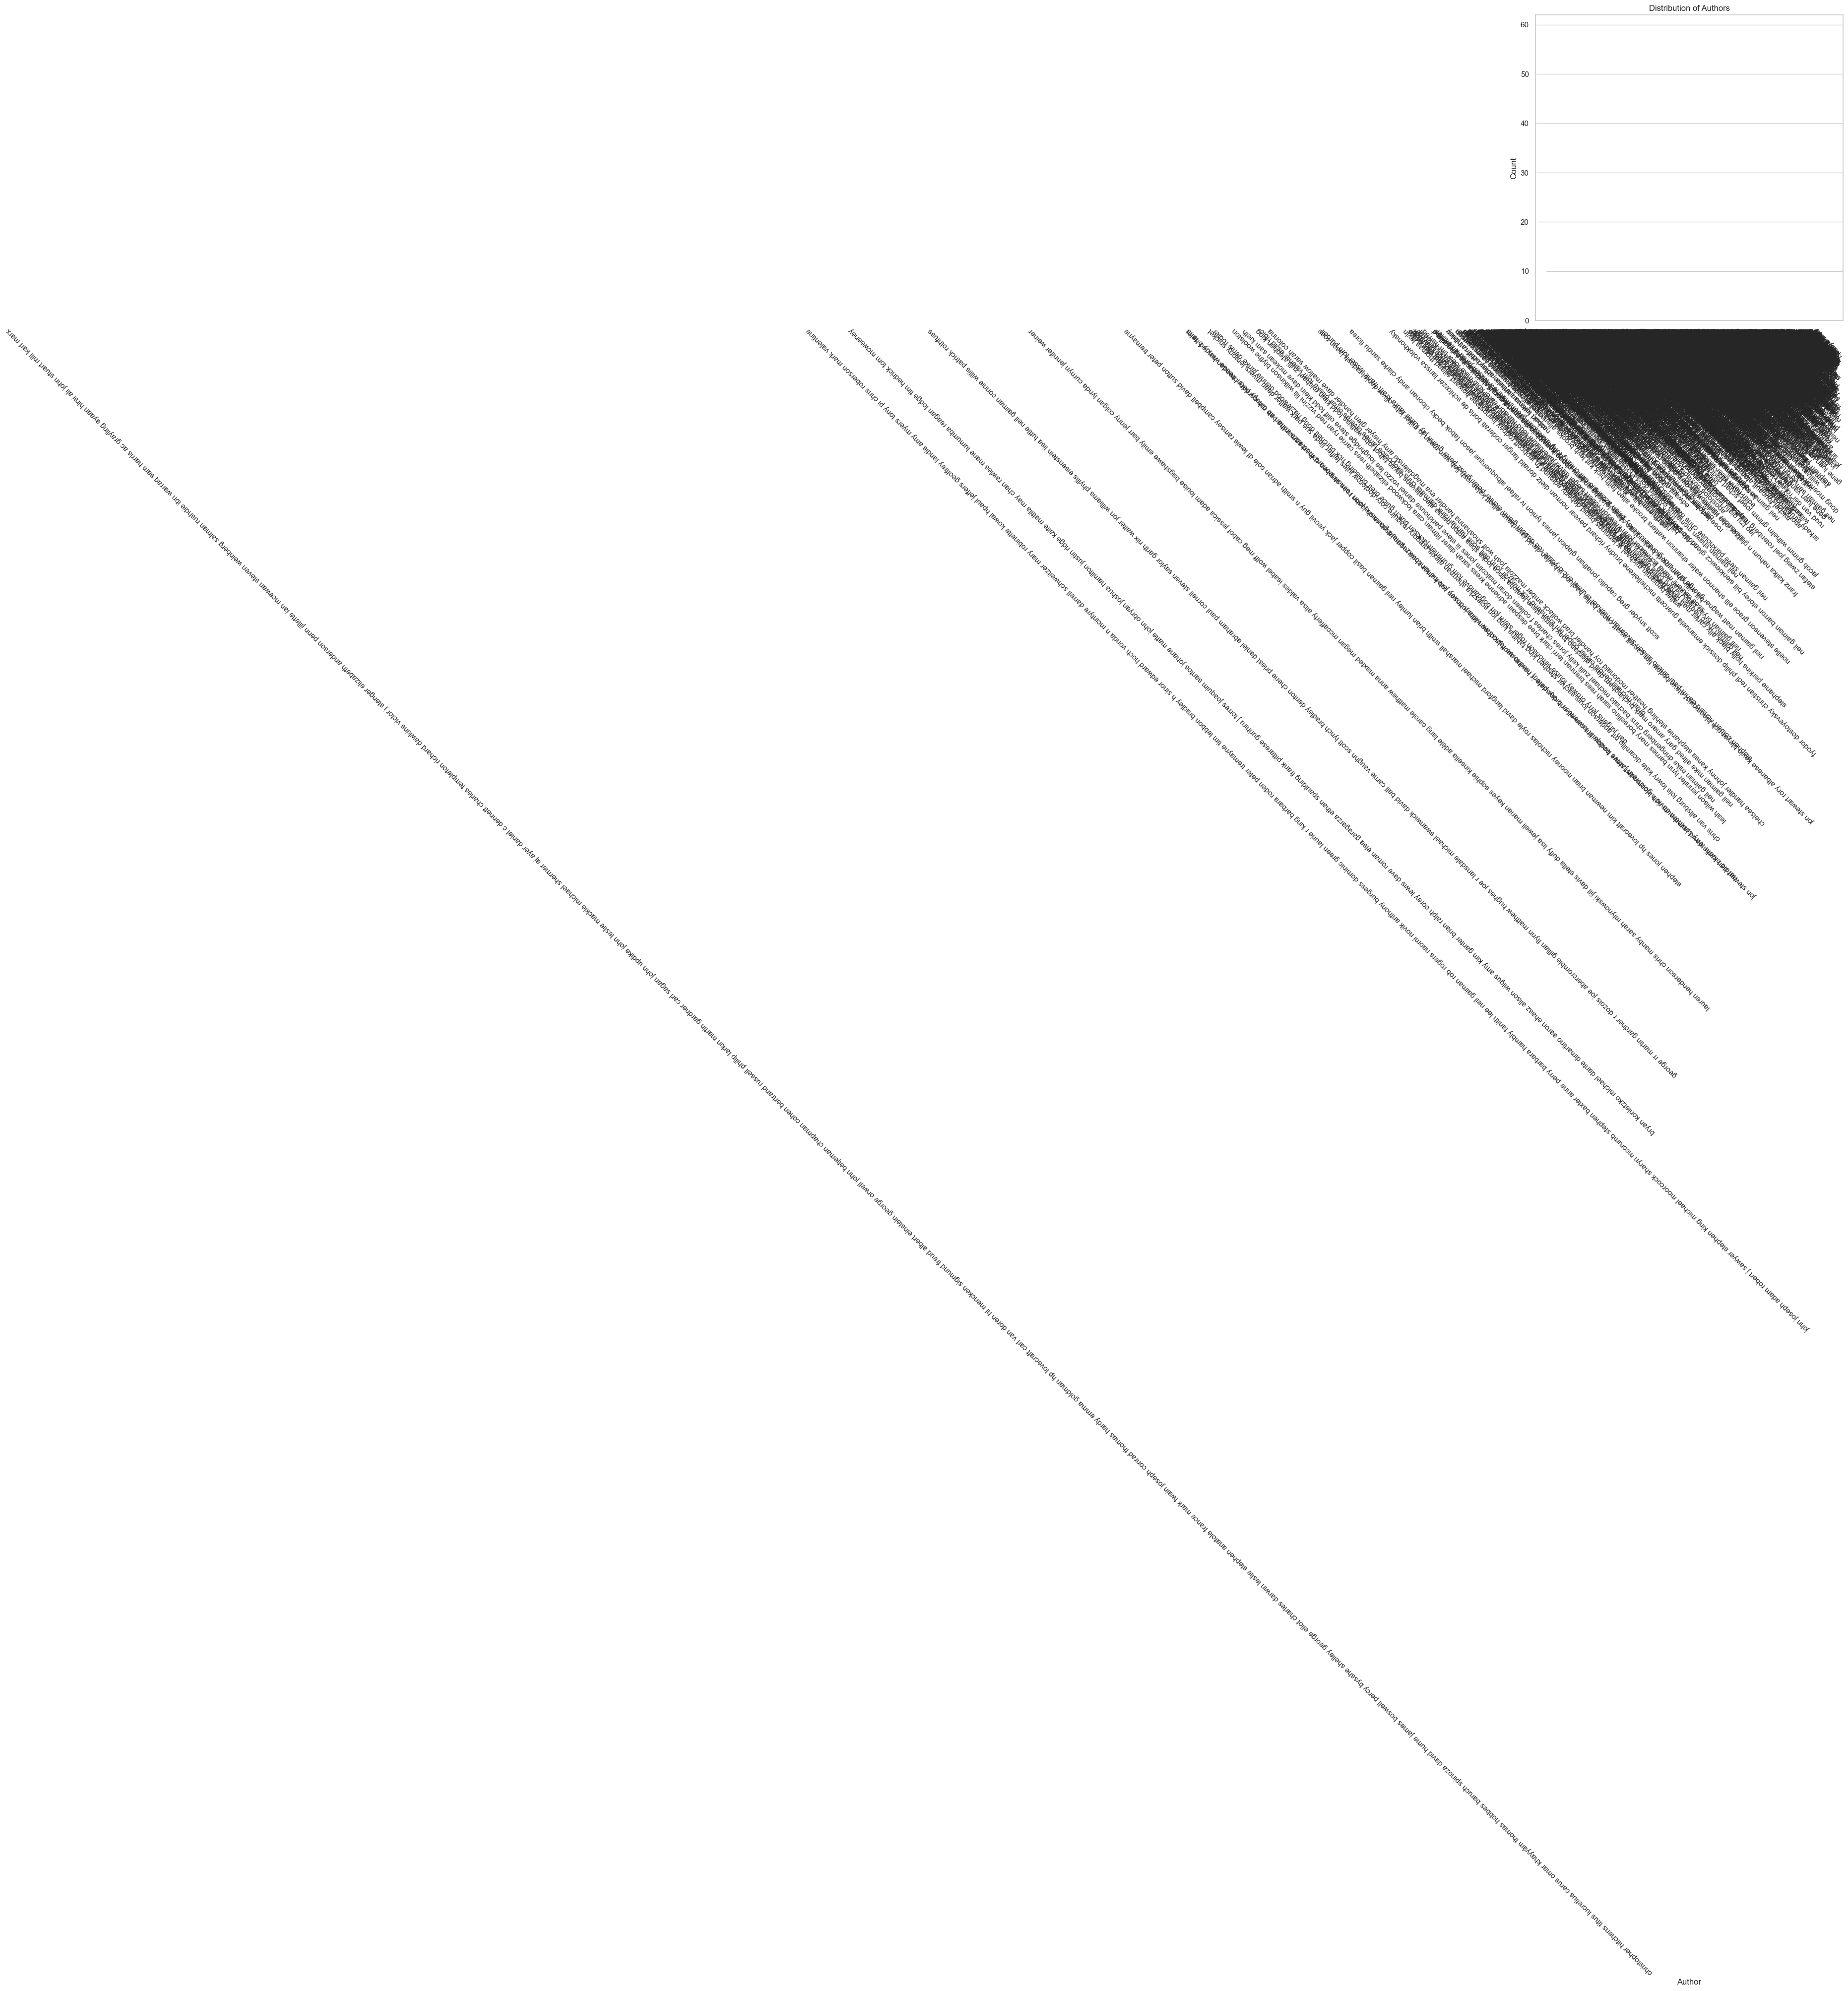

In [48]:
# Visualize the distribution of the number of books per author
plt.figure(figsize=(8, 8))
sns.countplot(x='authors', data=books, order=books['authors'].value_counts().index)
plt.title('Distribution of Authors')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=135, ha='right')
plt.show()

4.2 Temporal Analysis

C:\Users\ACER\AppData\Local\Temp\ipykernel_4784\66897471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='original_publication_year', data=books, palette='flare', order=books['original_publication_year'].value_counts().index)


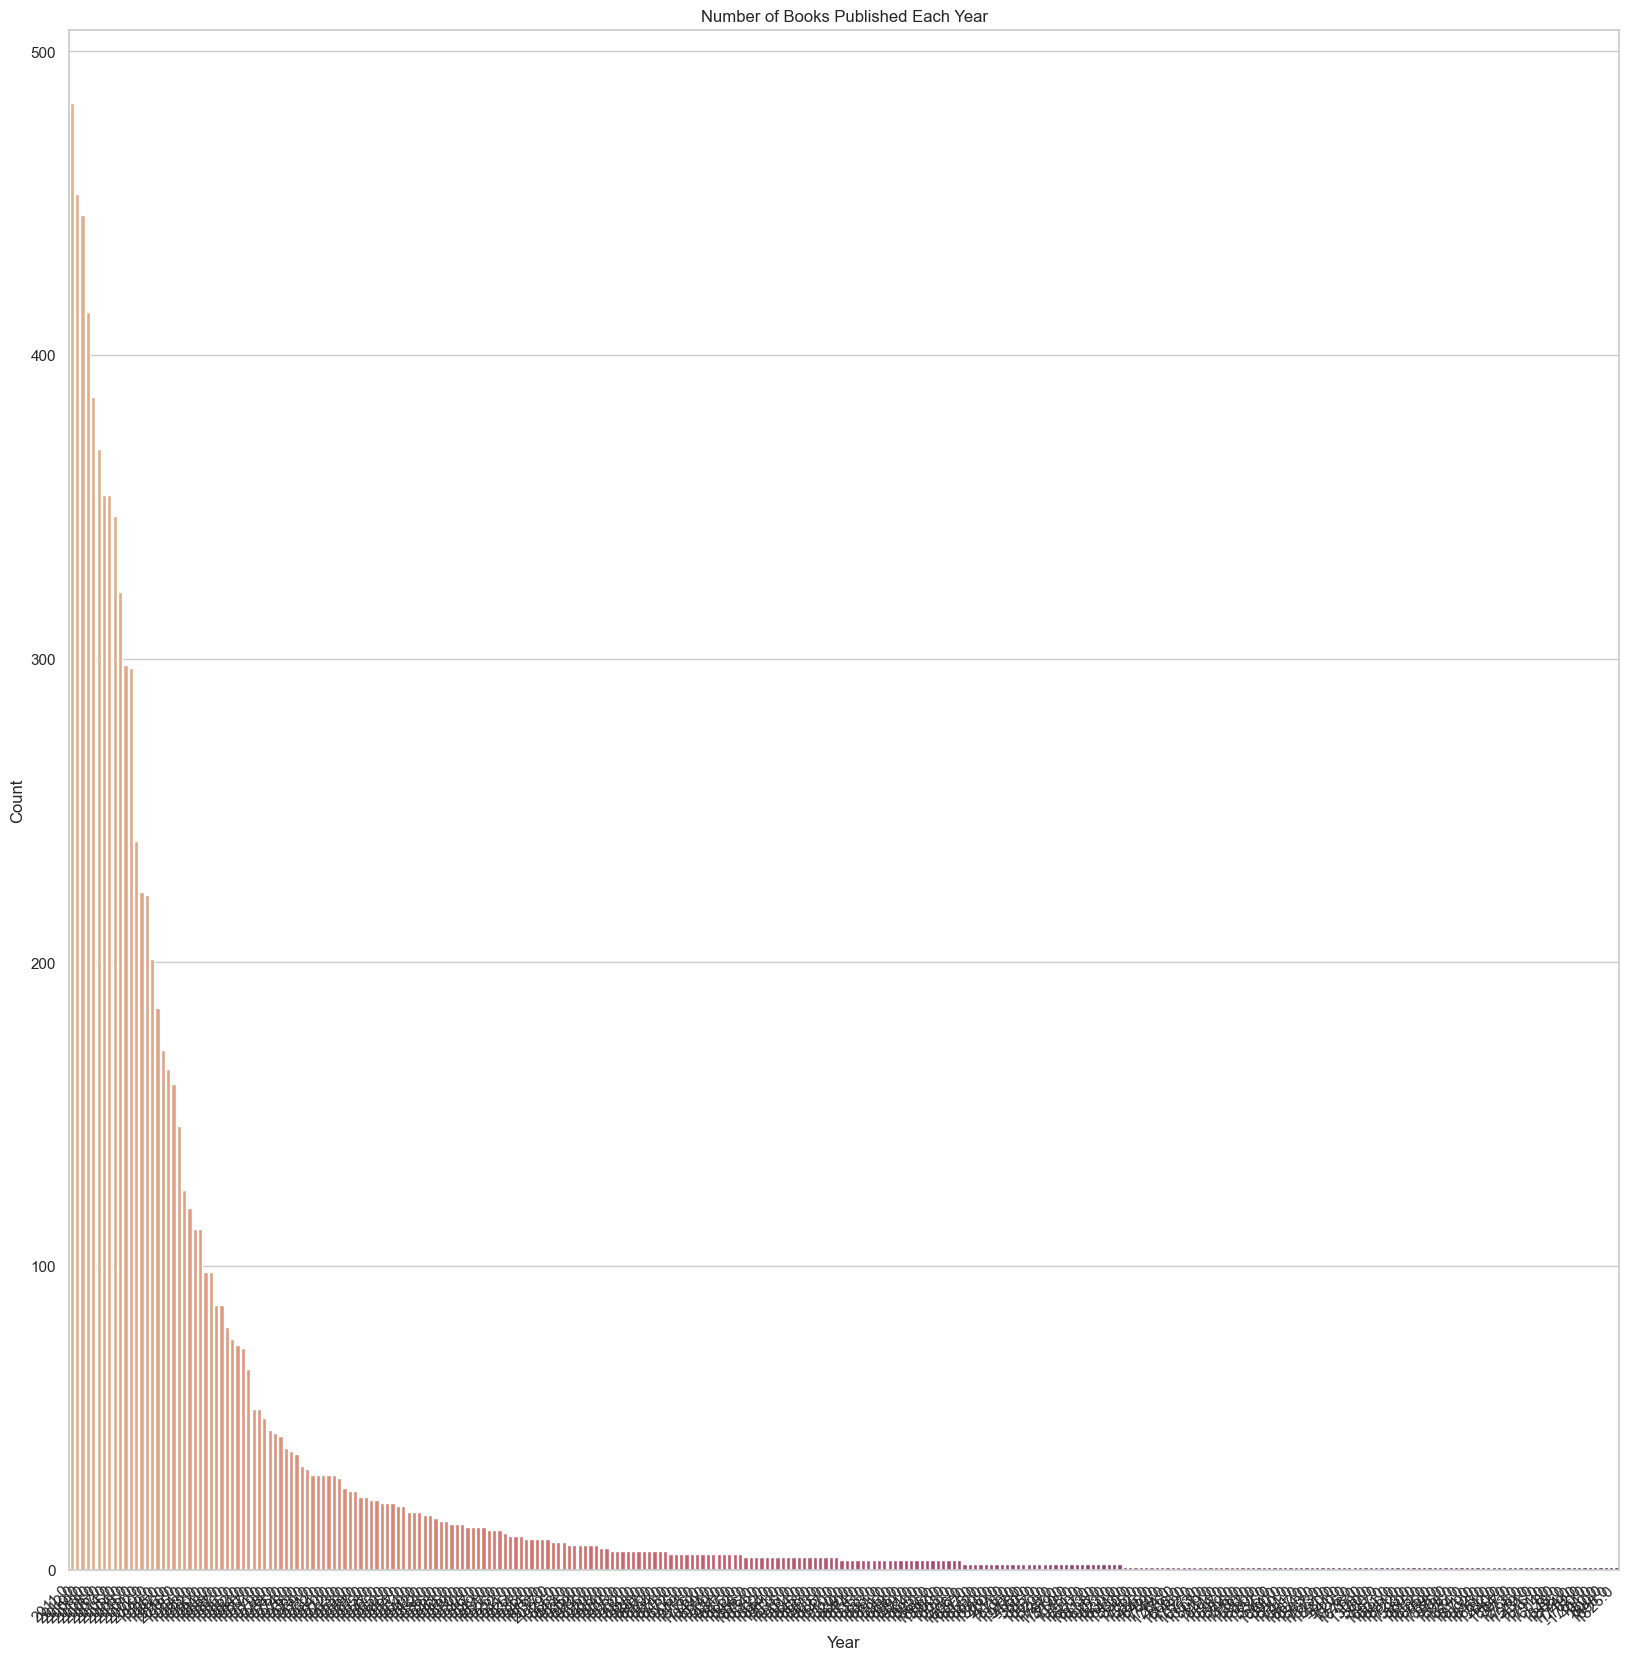

In [52]:
# Analyze trends over time, such as changes in user behavior or book popularity.
# Example: Visualize the number of books published each year.
plt.figure(figsize=(20, 20))
sns.countplot(x='original_publication_year', data=books, palette='flare', order=books['original_publication_year'].value_counts().index)
plt.title('Number of Books Published Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Correlation Analysis

5.1 Feature Correlation

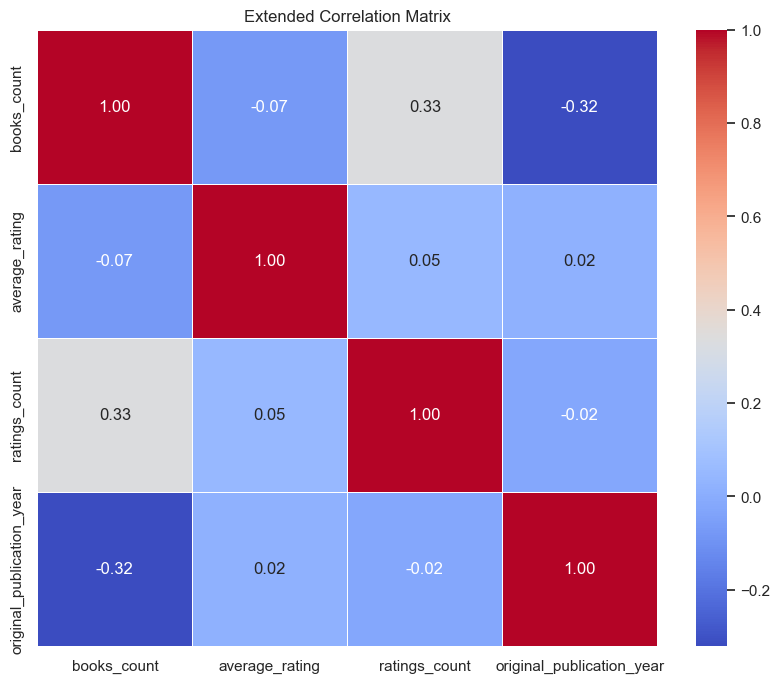

In [50]:
# Extend the correlation analysis to include other relevant features.
# Example: Adding 'original_publication_year' to the correlation matrix.
correlation_matrix_extended = books[['books_count', 'average_rating', 'ratings_count', 'original_publication_year']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Extended Correlation Matrix')
plt.show()

5.2 Rating vs Count Analysis

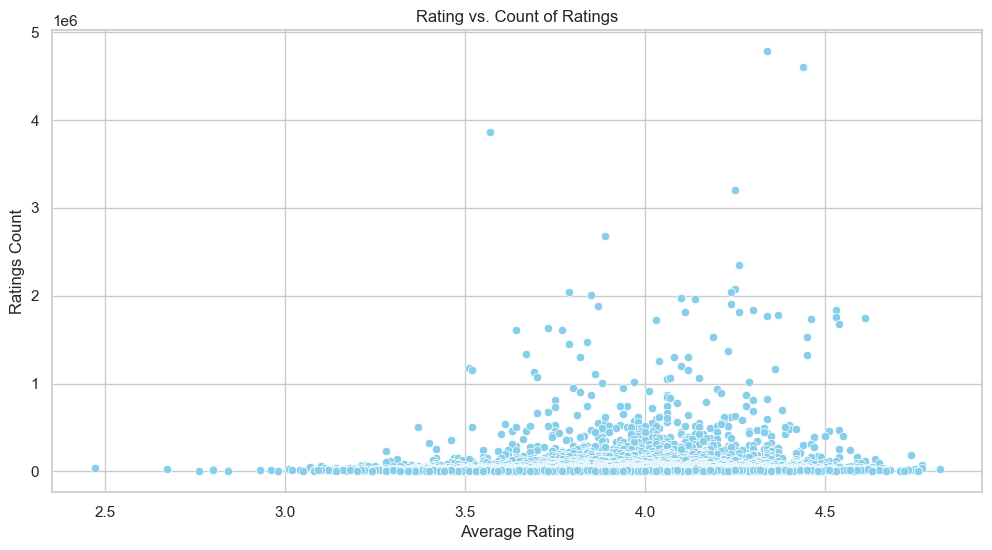

In [53]:
# Explore the Relationship between Average Ratings and the Count of Ratings.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_rating', y='ratings_count', data=books, color='skyblue')
plt.title('Rating vs. Count of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.show()

## 6. Interactive Visualizations

6.1 Using Plotly or Bokeh

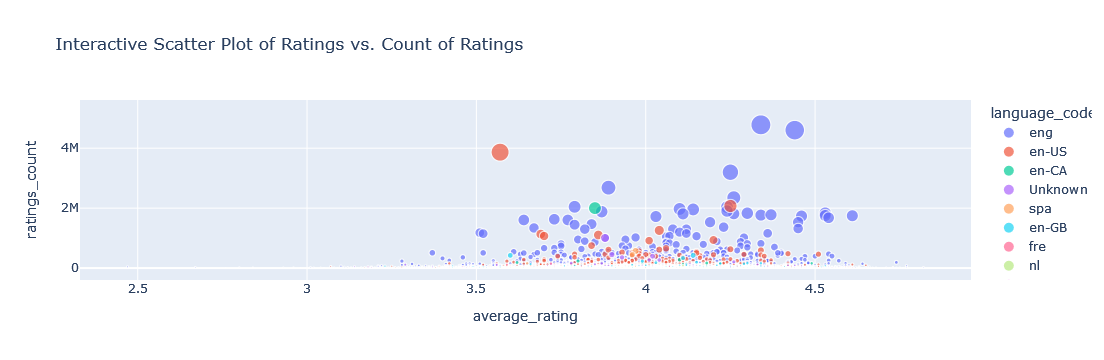

In [58]:
import plotly.express as px

fig = px.scatter(books, x='average_rating', y='ratings_count', hover_name='title', color='language_code', size='ratings_count',
                 title='Interactive Scatter Plot of Ratings vs. Count of Ratings')
fig.show()

## Data Preprocessing

In [59]:
from nltk.tokenize import word_tokenize

In [60]:
# Apply tokenization to 'title' and 'authors' columns
books['title_tokens'] = books['title'].apply(word_tokenize)
books['authors_tokens'] = books['authors'].apply(word_tokenize)

# Display a few samples
print("Sample Title Tokens:")
print(books['title_tokens'].head())

print("\nSample Author Tokens:")
print(books['authors_tokens'].head())

Sample Title Tokens:
0                      [hunger, game, hunger, game, 1]
1    [harry, potter, sorcerer, stone, harry, potter...
2                              [twilight, twilight, 1]
3                                  [kill, mockingbird]
4                                      [great, gatsby]
Name: title_tokens, dtype: object

Sample Author Tokens:
0               [suzanne, collins]
1    [jk, rowling, mary, grandpré]
2               [stephenie, meyer]
3                    [harper, lee]
4           [f, scott, fitzgerald]
Name: authors_tokens, dtype: object


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Combine tokens back into strings for TF-IDF vectorization
books['title_text'] = books['title_tokens'].apply(lambda tokens: ' '.join(tokens))
books['authors_text'] = books['authors_tokens'].apply(lambda tokens: ' '.join(tokens))

# TF-IDF Vectorization for Titles
tfidf_vectorizer_titles = TfidfVectorizer()
tfidf_matrix_titles = tfidf_vectorizer_titles.fit_transform(books['title_text'])

# TF-IDF Vectorization for Authors
tfidf_vectorizer_authors = TfidfVectorizer()
tfidf_matrix_authors = tfidf_vectorizer_authors.fit_transform(books['authors_text'])


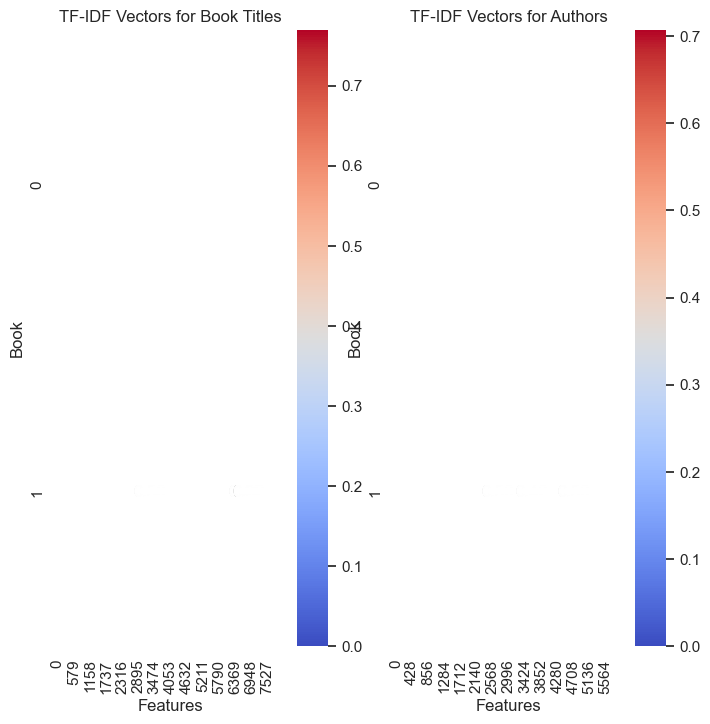

In [65]:
# Display TF-IDF matrices using a heatmap
titles = tfidf_matrix_titles.todense()[0:2]
authors = tfidf_matrix_authors.todense()[0:2]
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
sns.heatmap(titles, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('TF-IDF Vectors for Book Titles')
plt.xlabel('Features')
plt.ylabel('Book')
plt.subplot(1, 2, 2)
sns.heatmap(authors, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('TF-IDF Vectors for Authors')
plt.xlabel('Features')
plt.ylabel('Book')
plt.show()

In [67]:
import os

# Create the 'models' directory if it doesn't exist
models_dir = "./models"
os.makedirs(models_dir, exist_ok=True)

In [68]:
# Train Word2Vec model for titles
title_w2v_model = Word2Vec(sentences=books['title_tokens'], vector_size=100, window=5, min_count=1, workers=4)
title_w2v_model.save(os.path.join(models_dir, "title_w2v.model"))

# Train Word2Vec model for authors
authors_w2v_model = Word2Vec(sentences=books['authors_tokens'], vector_size=100, window=5, min_count=1, workers=4)
authors_w2v_model.save(os.path.join(models_dir, "authors_w2v.model"))

In [73]:
import pickle

# Create the 'tfidf_models' directory if it doesn't exist
tfidf_models_dir = "./tfidf_models"
os.makedirs(tfidf_models_dir, exist_ok=True)

# TF-IDF Vectorization for Titles
tfidf_vectorizer_titles = TfidfVectorizer()
tfidf_matrix_titles = tfidf_vectorizer_titles.fit_transform(books['title_text'])
tfidf_model_titles_path = os.path.join(tfidf_models_dir, "tfidf_model_titles.pkl")
with open(tfidf_model_titles_path, 'wb') as model_file:
    pickle.dump(tfidf_vectorizer_titles, model_file)

# TF-IDF Vectorization for Authors
tfidf_vectorizer_authors = TfidfVectorizer()
tfidf_matrix_authors = tfidf_vectorizer_authors.fit_transform(books['authors_text'])
tfidf_model_authors_path = os.path.join(tfidf_models_dir, "tfidf_model_authors.pkl")
with open(tfidf_model_authors_path, 'wb') as model_file:
    pickle.dump(tfidf_vectorizer_authors, model_file)

print("--------------------------------------------------------------------")
print("\n The code has been completed. \n ")

--------------------------------------------------------------------

 The code has been completed. 
 
